In [1]:
import snscrape.modules.twitter as sntwitter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import nltk
import json
import re

In [2]:
tweet_max = 100
tweets_list = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#GetVaccinatedOrGetCovid').get_items()):
    if i>tweet_max:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname])

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('vaccination work').get_items()):
    if i>tweet_max:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname])

df = pd.DataFrame(tweets_list, columns=['Datetime', 'Id', 'Content', 'Username', 'Like', 'Display Name'])

In [3]:
data = df.to_json('data1.json', orient='index')
new_df = pd.concat([df.head(3), df.tail(3)])
new_df = new_df.style.set_properties(subset=['Datetime', 'Id', 'Content', 'Username', 'Like', 'Display Name'], **{'text-align': 'left'})
new_df

In [4]:
tweets_list2 = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#NoVaccineForMe').get_items()):
    if i>tweet_max:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname])

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#StopVaccination').get_items()):
    if i>tweet_max:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname])

df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Id', 'Content', 'Username', 'Like', 'Display Name'])

In [5]:
data2 = df2.to_json('data2.json', orient='index')
new_df2 = pd.concat([df2.head(3), df2.tail(3)])
new_df2 = new_df2.style.set_properties(subset=['Datetime', 'Id', 'Content', 'Username', 'Like', 'Display Name'], **{'text-align': 'left'})
new_df2

In [6]:
with open('data1.json', 'r') as f:
    data = json.load(f)
    
df1 = pd.DataFrame.from_dict(data).T

In [7]:
with open('data2.json', 'r') as p:
    data2 = json.load(p)
    
df3 = pd.DataFrame.from_dict(data2).T

In [176]:
import cleantext
from cleantext import clean

#provide string with emojis
text = "This sample text contains laughing emojis 😀 😃 😄 😁 😆 😅 😂 🤣"

#print text after removing the emojis from it
print(clean(text, no_emoji=True))

TypeError: clean() got an unexpected keyword argument 'no_emoji'

In [177]:
import cleantext
from cleantext import clean
nltk.download('stopwords')
STOPWORD = set(stopwords.words('english'))
data1_content = df1['Content']
total = []

for i in data1_content:
    data1_split = i.lower().split()
    for j in data1_split:
        if j not in STOPWORD:
            total.append(j)
  

total = re.sub(r'#', '', str(total))
total = re.sub(r'\\n', '', str(total))
total = re.sub(r'@', '', str(total))
total = re.sub(r':', '', str(total))
total = re.sub(r';', '', str(total))
total = re.sub(r'[0-9]', '', str(total))
total = re.sub(r'(%)', '', str(total))
total = re.sub(r'/', '', str(total))
total = re.sub(r'!', '', str(total))
total = re.sub(r'▶️', '', str(total))
total = re.sub(r'k', '', str(total))
total = re.sub(r'()', '', str(total))
total = re.sub(r"http\S+", "", str(total))

total = total.strip('][').split(', ')



print (len(total))
print(total)

2995
["'let'", "'now,'", "'got'", "'jab'", "''", "'last'", "'night'", "'moderna'", "'modernavaccine'", "'modernafamily'", "'getvaccinated'", "'getvaccinatedasap'", "'getvaccinatednow'", "'getvaccinatedorgetcovid'", "' 'following'", "'necessary'", "'would'", "'lie'", "'everyone'", "'now...'", "'getting'", "'friday'", "'next'", "'wee'", "'getvaccinated'", "'moderna'", "'modernafamily'", "'getvaccinatedasap'", "'getvaccinatedorgetcovid'", "'💉💉💉💉💉'", "' 'getvaccinatedorgetcovid'", "'getvaccinatedsavelives'", "' 'ierstenwarren'", "'bmalmet'", "'getvaccinatedorgetcovid'", "'thedemcoalition'", "'getvaccinatedorgetcovid'", "'wearamas'", "'fred_guttenberg'", "'let’s'", "'loo'", "'list'", "'anti-vaxers'", "'died'", "'covid'", "'getvaccinatedorgetcovid'", "'masupj'", "'avoid'", "'large'", "'gatherings..'", "'one'", "'cannot'", "'afford'", "'buy'", "'n'", "'mass'", "'😷'", "'use'", "'triple'", "'layer'", "'surgical'", "'mass'", "'('", "'three'", "'surgical'", "'mass)'", "'&amp'", "'getvaccinatedorg

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data2_content = df3['Content']
total2 = []

for i in data2_content:
    data2_split = i.lower().split()
    for j in data2_split:
        if j not in STOPWORD:
            total2.append(j)
  

total2 = re.sub(r'#', '', str(total2))
total2 = re.sub(r'\\n', '', str(total2))
total2 = re.sub(r'@', '', str(total2))
total2 = re.sub(r':', '', str(total2))
total2 = re.sub(r';', '', str(total2))
total2 = re.sub(r'[0-9]', '', str(total2))
total2 = re.sub(r'(%)', '', str(total2))
total2 = re.sub(r'/', '', str(total2))
total2 = re.sub(r'!', '', str(total2))
total2 = re.sub(r'▶️', '', str(total2))
total2 = re.sub(r'k', '', str(total2))
total2 = re.sub(r'()', '', str(total2))
total2 = re.sub(r"http\S+", "", str(total2))

total2 = total2.strip('][').split(', ')



print (len(total2))
print(total2)


2633
["'clevelanddotcom'", "'novaccineforme'", "' 'drhoenderamp'", "'well'", "'said'", "'drhoenderamp'", "'wonder'", "'much'", "'devil'", "'sridhar'", "'paid'", "'promote'", "'toxic'", "'experimental'", "'shot'", "'saturdaythoughts'", "'clotshot'", "'novaccineforme'", "'greatreset'", "'spartacusjustic'", "'smeddows'", "'god'", "'bless'", "'president'", "'trump'", "'thin'", "'finally'", "'hashtag'", "'novaccineforme'", "'get'", "'suspended'", "'twitter?'", "'🤷\\ud♀️'", "'heart'", "'goes'", "'get'", "'vaccinated.'", "'believed'", "'right'", "'thing,'", "'sorry'", "'pray'", "'complications.'", '"can\'t"', "'figure'", "'why,'", "'struc'", "'off'", "'obvious'", "'anyone'", "'even'", "'half'", "'brain'", "'clotshot'", "'novaccineforme'", "'convid'", "'depopulation'", "' 'played'", "'last'", "'two'", "'years'", "'convid'", "'plandemic'", "'clotshot'", "'novaccineforme'", "'depopulation'", "'greatreset'", "'agenda'", "' 'immunity'", "'need'", '"\'boosting\'"', "'many'", "'friends'", "'question

In [10]:
co_oc = list(nltk.bigrams(total))

In [11]:
co_oc2 = list(nltk.bigrams(total2))

In [12]:
word = {}
count = 0
for i in co_oc:
    word[i] = count
    count = count+1

In [13]:
word2 = {}
count2 = 0
for i in co_oc2:
    word2[i] = count2
    count2 = count2+1

In [14]:
G = nx.Graph()
for i in total:
    G.add_node(i)

for j in word:
    G.add_edge(j[0], j[1])

In [31]:
g = nx.Graph()
for i in total2:
    g.add_node(i)

for j in word2:
    g.add_edge(j[0], j[1])

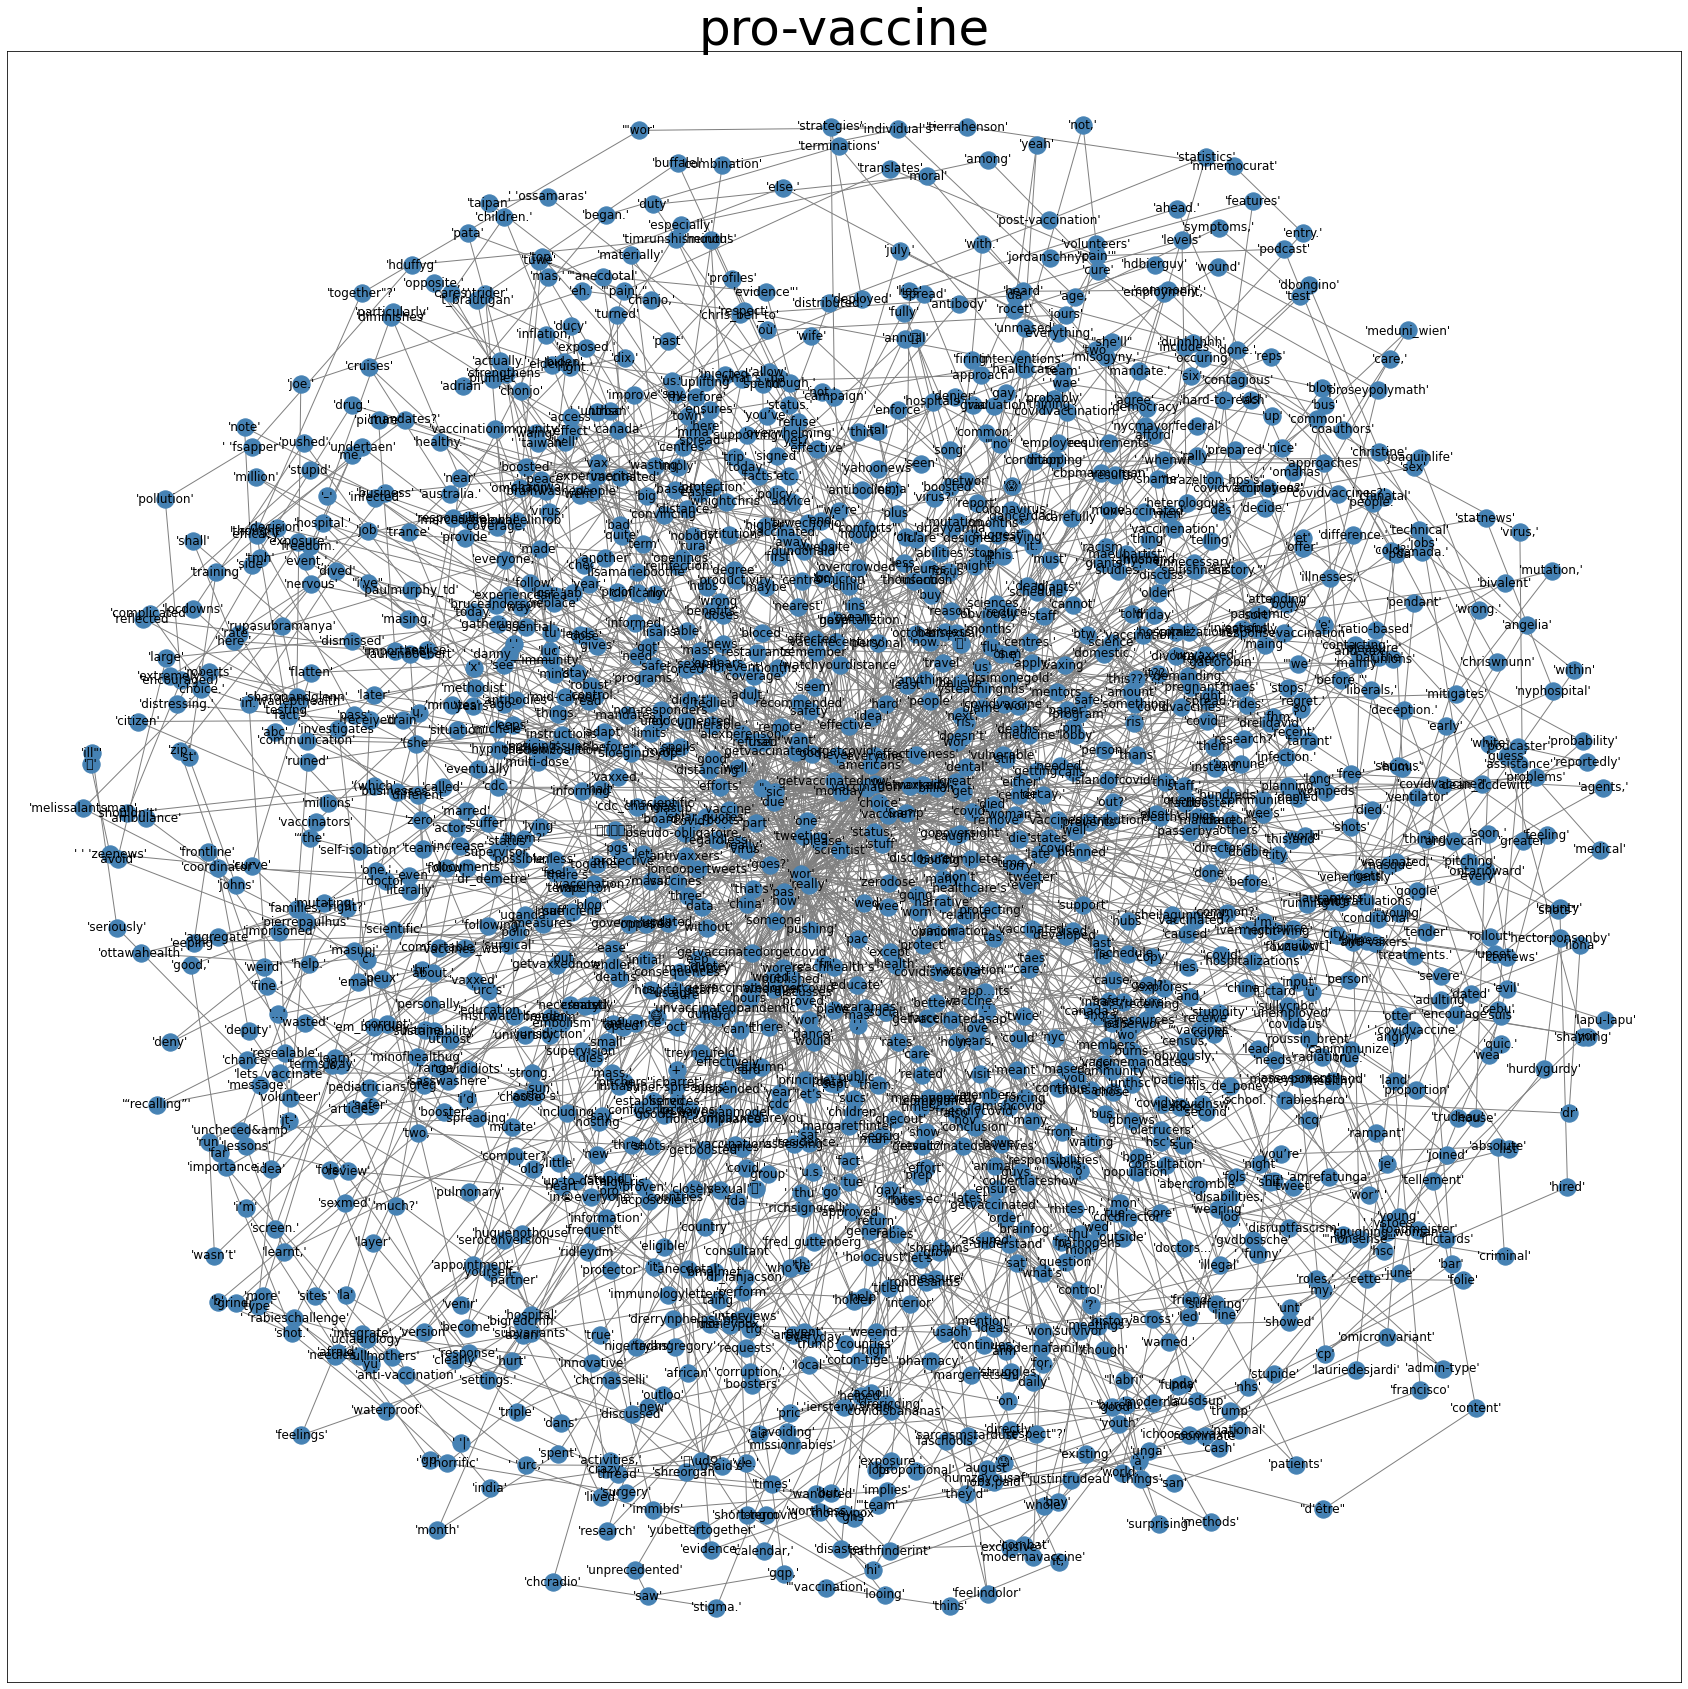

In [35]:
title="pro-vaccine"
plt.subplots(figsize=(30, 30))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx(G, pos, node_color='steelblue', edge_color='grey', with_labels =True)
plt.title(title, fontsize=50)
plt.show()

C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128405 (\N{REVERSED HAND WITH MIDDLE FINGER EXTENDED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129318 (\N{FACE PALM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo

C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127384 (\N{SQUARED SOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128163 (\N{BOMB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128330 (\N{DOVE OF PEACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32599 (\N{CJK UNIFIED IDEOGRAPH-7F57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:

C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Leo\anaconda3\lib\site-packag

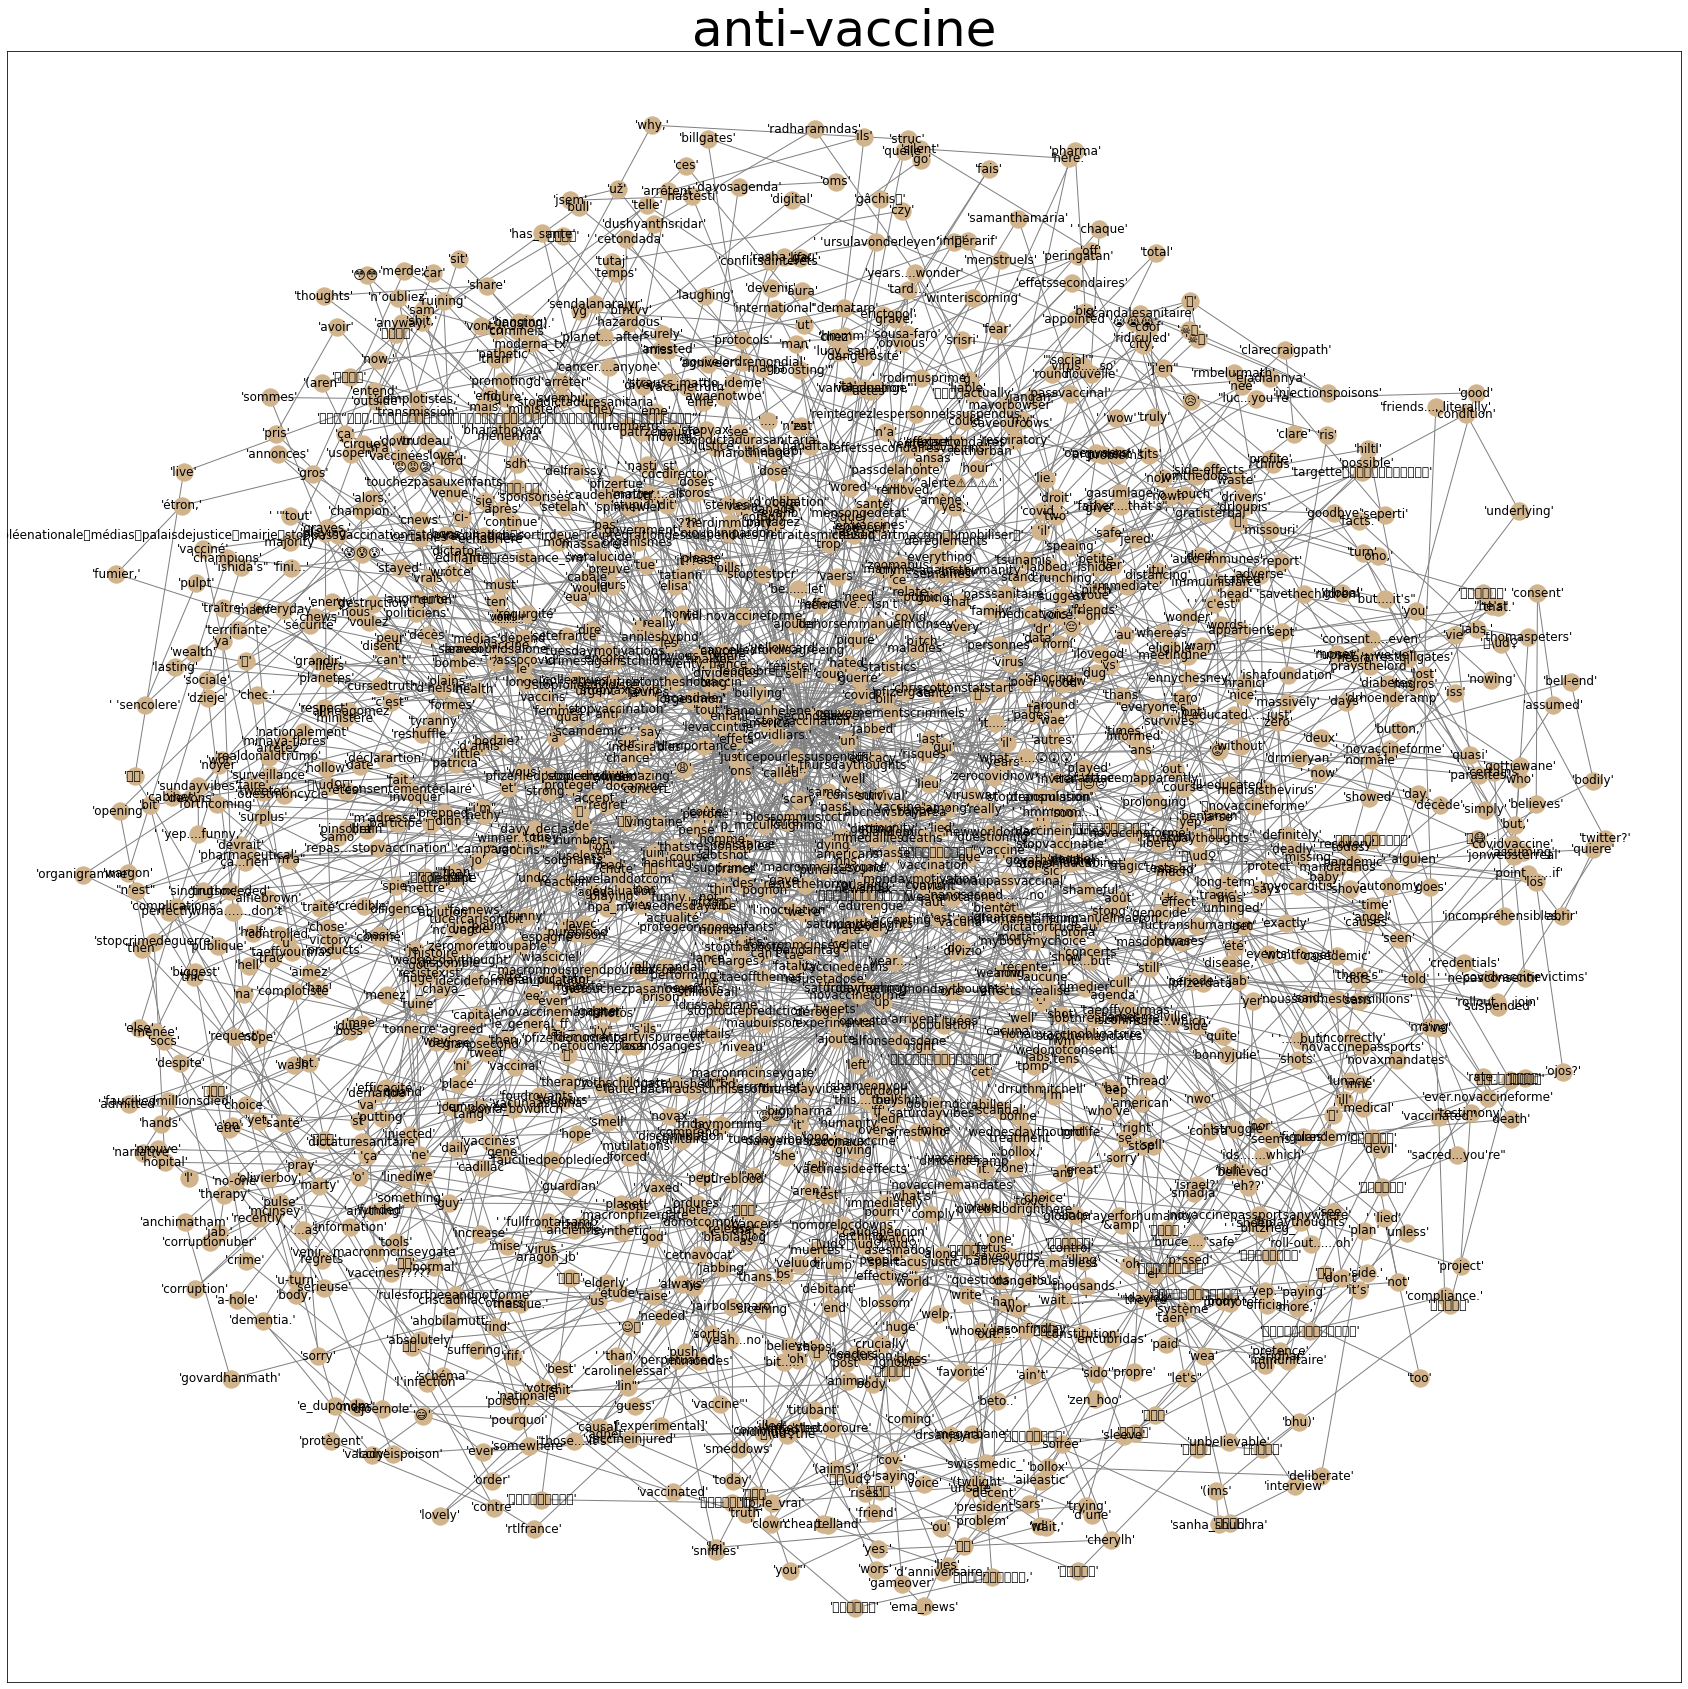

In [17]:
title="anti-vaccine"
plt.subplots(figsize=(30, 30))
pos = nx.spring_layout(g, k=0.15)
nx.draw_networkx(g, pos, node_color='tan', edge_color='grey', with_labels =True)
plt.title(title, fontsize=50)
plt.show()

(array([98., 12.,  7.,  1.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40., 

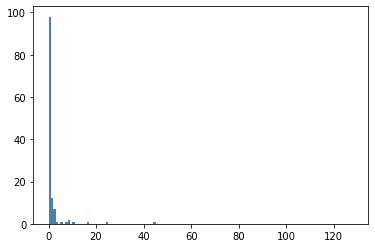

In [18]:
degree_hist = nx.degree_histogram(G)
plt.hist(degree_hist, range=(0, len(degree_hist)), bins=len(degree_hist), color='steelblue')

(array([112.,  10.,   5.,   1.,   1.,   1.,   3.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.

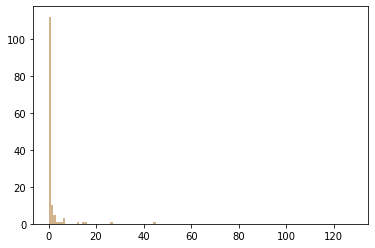

In [19]:
degree_hist2 = nx.degree_histogram(g)
plt.hist(degree_hist2, range=(0, len(degree_hist)), bins=len(degree_hist), color='tan')

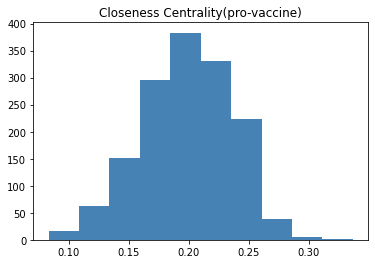

In [151]:
clo_cen = nx.closeness_centrality(G)
plt.hist(list(clo_cen.values()), facecolor='steelblue')
plt.title('Closeness Centrality(pro-vaccine)')
plt.show()

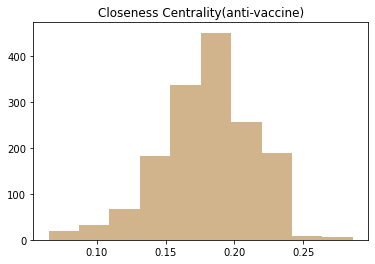

In [152]:
clo_cen2 = nx.closeness_centrality(g)
plt.hist(list(clo_cen2.values()), facecolor='tan')
plt.title('Closeness Centrality(anti-vaccine)')
plt.show()

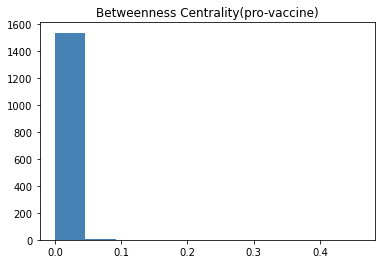

In [147]:
bet_cen = nx.betweenness_centrality(G)
plt.hist(list(bet_cen2.values()), facecolor='steelblue')
plt.title('Betweenness Centrality(pro-vaccine)')

plt.show()

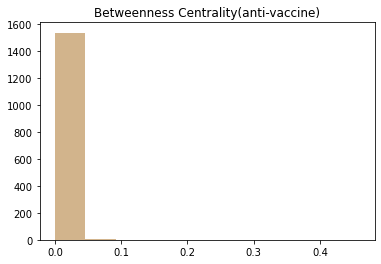

In [153]:
bet_cen2 = nx.betweenness_centrality(g)
plt.hist(list(bet_cen2.values()), facecolor='tan')
plt.title('Betweenness Centrality(anti-vaccine)')

plt.show()